# Types of Regression Algorithms

In this note book we will be talking about 6 types of regression Machine Learning algorithms in detail. Those six Algorithms are as follows,

    1. Simple Linear Regression
    2. Multiple Linear Regression
    3. Polynomial Regression
    4. Support Vector for Regression (SVR)
    5. Decision Tree Classification
    6. Random Forest Classification

## What is Regression used for...

As we learned there are mainly two type of ML Problems,

   * Predicting a Label(Classification)
   * Predicting a value(Regression)

So unlike in classification problems in regression problems what is done is model is trained on data and used to predict a value.

Ex: Predicting a price of a car when certain parameters and details are given.

## 1. Simple Linear Regression

This is the simplest algorithm hence the name. How this model(algorithm) works is that, it look at the training data its given `X_test, y_test` and try to draw a linear line that would best fit the all the data points.

<img alt="Simple Linear Regression Demostration" src="./images/simple_linear_regression.png" style="width:55%;height:auto"/>

Model draws a regression line, `y = b0 + b1*X` just as normal `y = mx + c`. Where,
   * b0 = constant (intercept)
   * b1 = this represent how unit change in X (independent variable) affect the values y (dependent variable)

As shown in the above figure, what the model does is it draws several regression lines and it take the sum as `SUM = Residuals**2` and store them. And pick the regression line with the __Minimum Sum__ as the final Regression Line.

In [1]:
# Simple Linear Regression Model

# Import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# set a random seed globally
np.random.seed(42)

In [2]:
# lets preprocess our data

# import the data
data = pd.read_csv('data/Simple Linear Regression/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# now we have to check if there are any missing values
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
# Okay no missing values then lets just see details of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# All numeric data type and we dont have to manipulate data

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


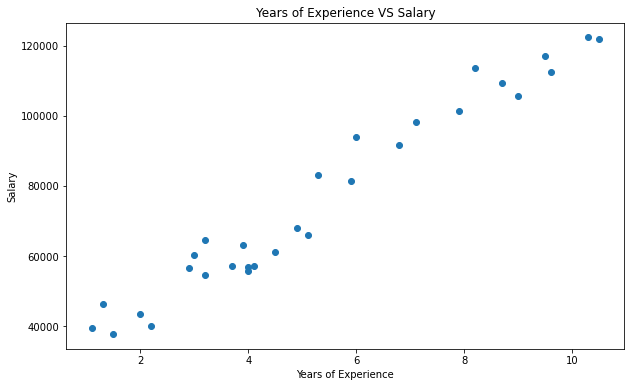

In [6]:
# Lets plot these and see
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(x=data['YearsExperience'],y=data['Salary'],cmap="winter", marker='o')
ax.set_title('Years of Experience VS Salary')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

In [7]:
# lets divide our data into X and y
X = data.drop('Salary',axis=1)
y = data['Salary']

# Lets split the data to train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3)

In [8]:
len(X_train), len(X_test)

(20, 10)

In [9]:
# Now we can fit the data to our model

# Importing the simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train,y=y_train)

LinearRegression()

In [10]:
# Now lets see the score
model.score(X=X_test, y=y_test)

0.9553063138044949

In [11]:
# 95% Score.... Not bad

# lets see some predictions
y_pred = model.predict(X_test)

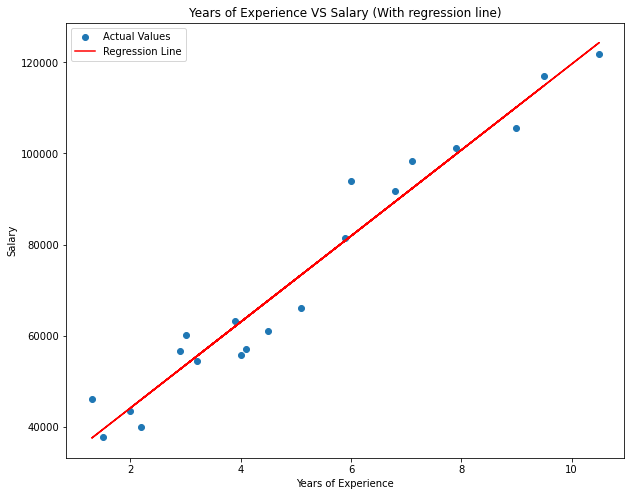

In [12]:
# So now we can plot the regression Line

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=X_train,y=y_train,cmap="winter", marker='o', label='Actual Values')
ax.plot(X_train,model.predict(X_train),color='red',label='Regression Line')
ax.legend()
ax.set_title('Years of Experience VS Salary (With regression line)')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

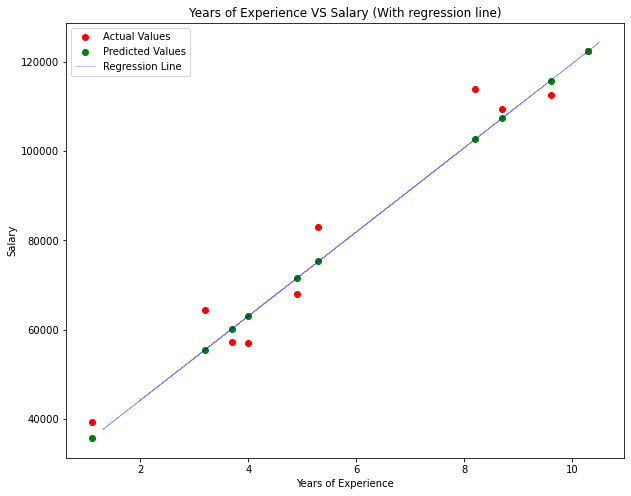

In [13]:
# lets see how well this model can predict new values

# So now we can plot the regression Line

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=X_test,y=y_test,cmap="winter", marker='o', label='Actual Values', color='red')
ax.scatter(x=X_test,y=y_pred,cmap="winter", marker='o', label='Predicted Values', color='green')
ax.plot(X_train,model.predict(X_train),color='blue',label='Regression Line',linewidth=0.5,alpha=0.5)
ax.legend()
ax.set_title('Years of Experience VS Salary (With regression line)')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

## 2. Multiple Linear Regresion

Here the intuition is as same as simple Linear Regression. But in Multiple linear regression the equation looks like this,

`y = b0 + b1.X1 + b2.X2 + ... + bn.Xn`

In [14]:
# Multiple linear regression

# importing the important modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

In [15]:
# Preprocessing data

data = pd.read_csv('./data/Multiple Linear Regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# Lets see some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
# there is one categorical data we will have to take care of that
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [18]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

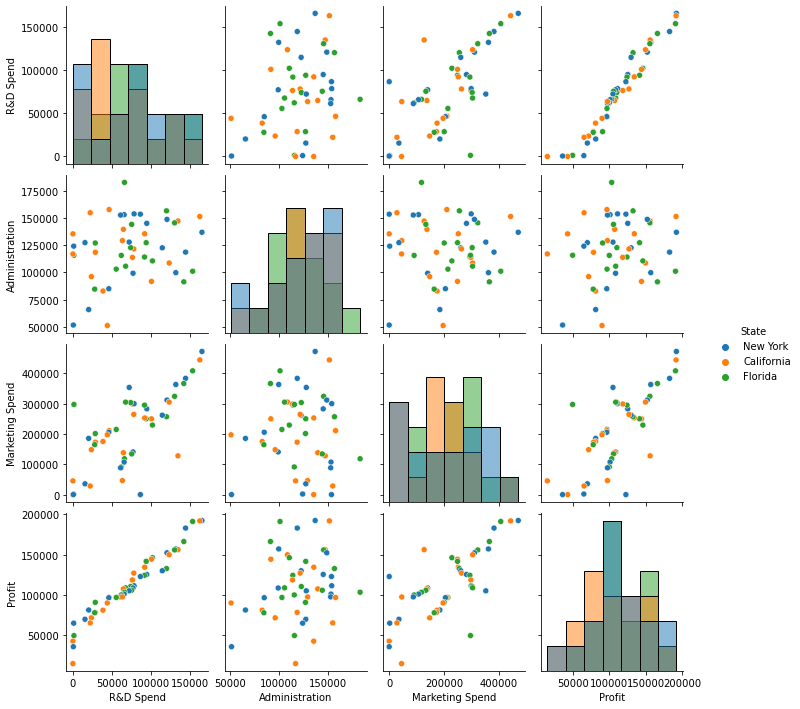

In [19]:
# no missing values that is good

# explore the dataset and we will see
import seaborn as sns

# we can see the correlation of each variable using
sns.pairplot(data,hue='State',diag_kind='hist');

In [20]:
#It seams that R&D, Marketting spend and profit has the most correlation

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
# we have to convert this to a numerical variable
# Lets import relavent modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# First create a instance of OneHotencoder
one_hot = OneHotEncoder()


# and define an array with the fetures/attributes of the dataframe we want to be converted
categorical_features =['State']

# Define a column transformer to transform the columns and combine everything
# what this says is transform the colums mentioned in 'categorical_fetures' using
# the transformer one_hot which is named as 'one_hot' let other columns passthrough and include in the final
transformer = ColumnTransformer(transformers=[('one_hot',one_hot,categorical_features)],remainder='passthrough')

# now that we have a transformer ready to transform all we have to do is give it the data
transformed_data = transformer.fit_transform(data)
transformed_df =pd.DataFrame(transformed_data)
transformed_df.head()

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [22]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
# we have to drop one column in order to get rid of dummy column in order to avoid "dummy variable trap"
transformed_df.drop(2,axis=1,inplace=True)

In [24]:
transformed_df.head()

,0,1,3,4,5,6
0,0.0,0.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,142107.34,91391.77,366168.42,166187.94


In [25]:
# now we cansplit the data
X = transformed_df.drop(6, axis=1)
y = transformed_df[6]

In [26]:
# lets split the data into train test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
len(X_train),len(X_test)

(40, 10)

In [28]:
# Now we can fit this to a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train,y=y_train);

In [29]:
# Now that model is trained we can see how it has done
model.score(X_test,y_test)

0.8987266414319358

In [30]:
# 89% not good but not bad as well


In __multiple linear regression__ there are ways we can use our independent variables.

* All in - Where we use all of the independent variables
* Backward elimination - Where we consider "P value" s of each attribute and get rid of the once higher than tha significance value
* Forward selection
* Bidirectional Elimination
* Score comparison


## 2. Polynomial Regression

This is kind of an linear regression much like simple linear regression and multiple linear regression. Here but there are no multiple independent variables, Only one independent variable. The equation looks like this,

`y = b0 + b1.X1 + b2.X1^2 + b3.X3^3 + ... + bn.Xn^n`

As you can see we have polynomials of a single independent variable.

_**Then how can we say this is a linear model..?**_

Well linearity is based on the co-efficients not the variables. Because in reality, __What our model does is calculate those coefficients so that it can give a accurate prediction__. Coeffiecients are the real unknowns that model has to decide, Since they are all linear, these models are called linear models

> So in the following Models we will be discussing a problem where an employing is demanding a 160,000 Salary saying he got that much from his previous job. With the info we have we have to predict whether he is telling the truth, his level is 6.5.

In [31]:
# Lets import the main modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting a global random seed just incase
np.random.seed(42)

In [32]:
# lets preprocess the data

# import the dataset
data = pd.read_csv('data/Polynomial Regression/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [34]:
# no need for check for missing values and 
# there is one non-numeric column but its okay we will not be using it

# split the data into features and target
X = data.drop(labels=['Position', 'Salary'], axis=1)
y = data['Salary']

# Theres  no need to split the data since there are only 10 entries

# lets create the polynomial features
from sklearn.preprocessing import PolynomialFeatures

X_pol = PolynomialFeatures(degree=2).fit_transform(X=X)
X_pol

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [35]:
# lets Import the models

# NOTE: There is no special polynomial regression model only the linear regression model the diffrence is the input we give it as X

from sklearn.linear_model import LinearRegression

# lets make two models one simple linear and other polynomial linear just compare
linear_model = LinearRegression()

linear_model.fit(X,y)
y_pred = linear_model.predict(X)

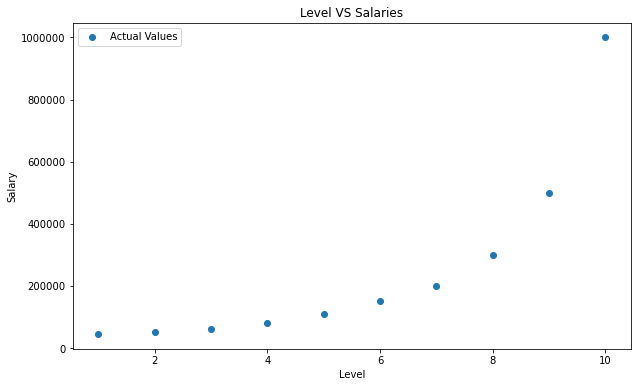

In [55]:
# lets try to plot this
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(data['Level'],data['Salary'],label="Actual Values")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

In [37]:
# You can see linear regression is way off

# Polynomial model
poly_model =LinearRegression()

poly_model.fit(X_pol,y)

y_pred_poly = poly_model.predict(X_pol)

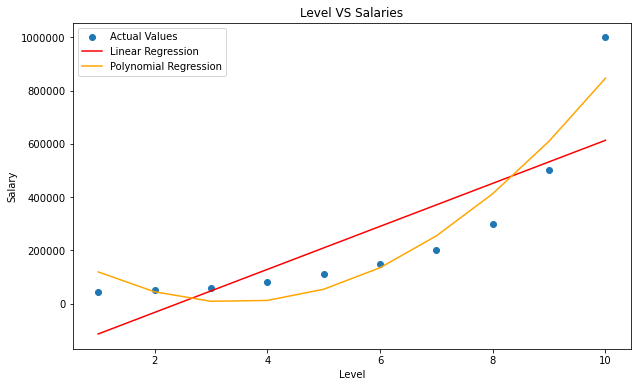

In [54]:
# lets try to plot this
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(data['Level'],data['Salary'],label="Actual Values")
ax.plot(data['Level'],y_pred, color='red', label="Linear Regression")
ax.plot(data['Level'],y_pred_poly, color='orange', label="Polynomial Regression")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

In [39]:
# however you can see that now that polynomial regression line fit the data points with less errors that the linear one
# we can make this more fit by increasing the degree

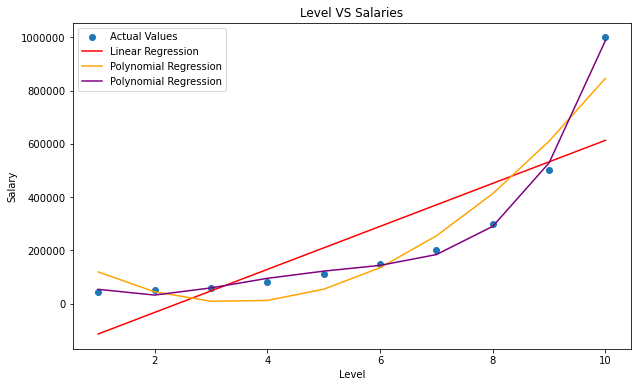

In [53]:
# lets create the polynomial features
from sklearn.preprocessing import PolynomialFeatures

X_pol_2 = PolynomialFeatures(degree=4).fit_transform(X=X)
X_pol_2

# Polynomial model
poly_model_2 =LinearRegression()

poly_model_2.fit(X_pol_2,y)

y_pred_poly_2 = poly_model_2.predict(X_pol_2)

# lets try to plot this
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(data['Level'],data['Salary'],label="Actual Values")
ax.plot(data['Level'],y_pred, color='red', label="Linear Regression")
ax.plot(data['Level'],y_pred_poly, color='orange', label="Polynomial Regression")
ax.plot(data['Level'],y_pred_poly_2, color='purple', label="Polynomial Regression")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

In [41]:
# 6.5 predictions
predict_level = np.array([6.5]).reshape(1,1)
pred_1 = linear_model.predict([[6.5]])

pred_2 = poly_model.predict(PolynomialFeatures(degree=2).fit_transform(X=predict_level))
pred_3 = poly_model_2.predict(PolynomialFeatures(degree=4).fit_transform(X=predict_level))

pred_1, pred_2, pred_3

D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([330378.78787879]), array([189498.10606061]), array([158862.45265153]))

## 4. SVR (Support Vector Regression)

In [42]:
# Lets import the main modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting a global random seed just incase
np.random.seed(42)

In [43]:
# lets preprocess the data

# import the dataset
data = pd.read_csv('data/Polynomial Regression/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [143]:
# no need for check for missing values and 
# there is one non-numeric column but its okay we will not be using it

# split the data into features and target
X = data.drop(labels=['Position', 'Salary'], axis=1)
y = data['Salary']

# Theres  no need to split the data since there are only 10 entries

In [144]:
# Lets import the models
from sklearn.svm import SVR

# let create a SVR model
model = SVR(kernel=)

model.fit(X,y)
y_pred = model.predict(X)

SyntaxError: invalid syntax (2076653242.py, line 5)

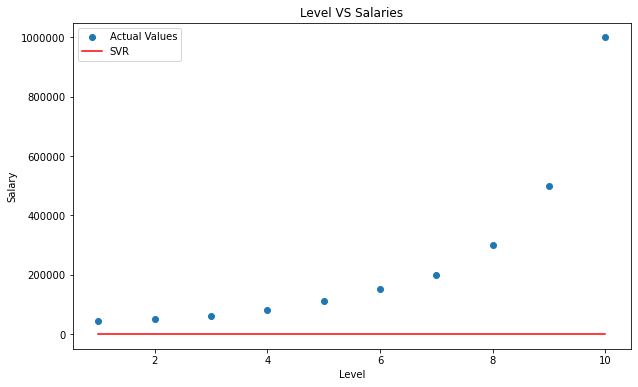

In [145]:
# lets try to plot this
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(data['Level'],data['Salary'],label="Actual Values")
ax.plot(data['Level'],y_pred, color='red', label="SVR")
#ax.plot(data['Level'],y_pred_poly, color='orange', label="Polynomial Regression")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

In [177]:
np.reshape(np.array(y),(10,1)), y.shape

(array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]], dtype=int64),
 (10,))

In [162]:
# this happen because we did not do feature scaling
# since this is not common it did not include feature scaling

# feature scaling
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scale = scaler_X.fit_transform(X)
y_scale = scaler_y.fit_transform(np.reshape(np.array(y),(10,1)))


In [163]:
X_scale, X_scale.shape, type(X_scale)

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 (10, 1),
 numpy.ndarray)

In [164]:
y_scale, y_scale.shape, type(y_scale)

(array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]),
 (10, 1),
 numpy.ndarray)

In [165]:
# Since the models expect 1D array for y we have to reshape y
y_scale = np.reshape(y_scale, (10,))

In [166]:
# lets make SVR Model with scaled values
model = SVR()

model.fit(X_scale,y_scale)
y_pred = model.predict(X_scale)
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

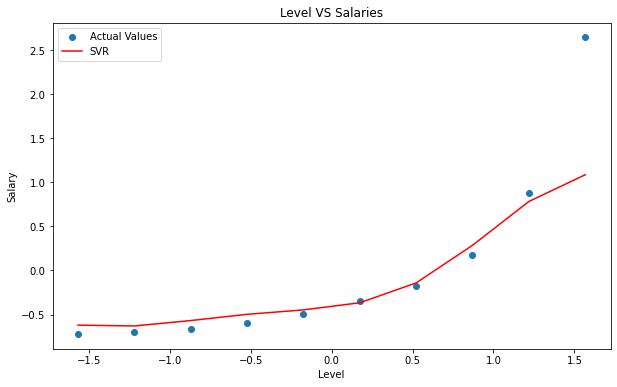

In [174]:
# lets try to plot this
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(X_scale,y_scale,label="Actual Values")
ax.plot(X_scale,y_pred, color='red', label="SVR")
#ax.plot(data['Level'],y_pred_poly, color='orange', label="Polynomial Regression")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

In [175]:
# now lets predict the value of 6.5
# first we have to scale this
# Since scaler is expecting a 2D array we have to reshape it to have one cell

scaled_pred = model.predict(scaler_X.fit_transform([[6.5]]))
scaled_pred.shape, type(scaled_pred)

((1,), numpy.ndarray)

In [181]:
# since we get a scaled version of the value we have to inverse scale it to real value using y_scaler
scaler_y.inverse_transform(np.reshape(scaled_pred,(1,1)))

array([[131106.77303274]])

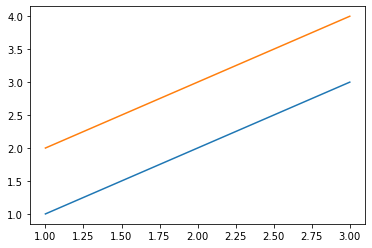

In [171]:
# This is for the X confusion
# When a something is passed that isn not shape of vector(1,10)/(10,)
# What mat plot lib does is look at each column seperately as verctors

x = [1,2,3]
z = [[1,2],[2,3],[3,4]]

plt.plot(x,z)

In [172]:
x = np.array([[1,2],[2,3],[3,4]])
x.shape

(3, 2)

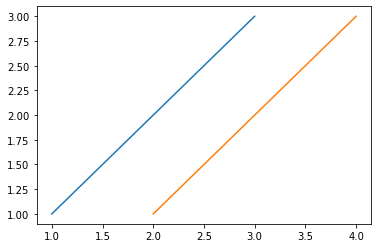

In [173]:
x = [[1,2],[2,3],[3,4]]
z = [1,2,3]

plt.plot(x,z)

## 5. Decision Tree Regression

There are mainly two type of Decision Trees,

* Classification Trees
* Regression Trees

Let's consider a scenario where there are two independent variables (X1,X2) and one independent variable y. If we conside 3D plane(x,y,z) y is like the z.

<img alt="working of regression tree" src="./images/regression_tree_workings.png"/>

So the decision tree is build like in the above image, so the regions are devided using entropy. and the values are decided using the `mean` or some thing that user defined. and that value means that if a new point enter that region it has a higher likely hood of having that value.

In [182]:
# lets implement the decision tree
# import the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
# Data preprocessing
data = pd.read_csv('data/Decision Tree Regression/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [189]:
# Split Data
X = data.iloc[:,1:2]
X.shape

(10, 1)

In [191]:
y = data.iloc[:,-1]
y.shape

(10,)

In [196]:
# dont need to split the data to train and test since there only 10 data

# lets import the model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X,y);

y_pred = model.predict(X)

In [197]:
# lets get the score
model.score(X,y)

1.0

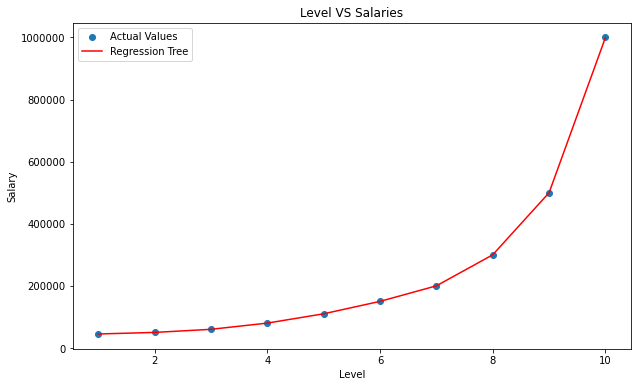

In [199]:
# has a perfect score that's a red flag lets see visually what has happened

# lets try to plot this
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(X,y,label="Actual Values")
ax.plot(X,y_pred, color='red', label="Regression Tree")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


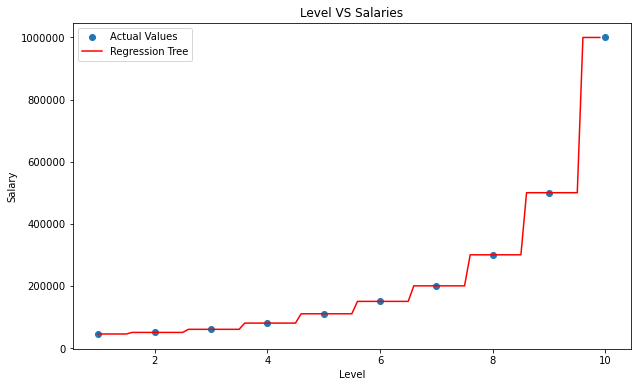

In [244]:
# Now lets see how can this be
# this cant be happening because, Sinece only this 1D decision tree split the Level axis into regions and get mean values for those regions
# if thats the case for each region we should have seperate horzontal lines as steps
# So what has happen here is that since we plot distict levels plot function connect thosemean values
# this can be avoided if we use continuos range for labels

new_X = np.arange(X['Level'].min(),X['Level'].max(),0.1)
new_X = np.reshape(new_X,(len(new_X),1))
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(X,y,label="Actual Values")
ax.plot(new_X,model.predict(new_X), color='red', label="Regression Tree")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


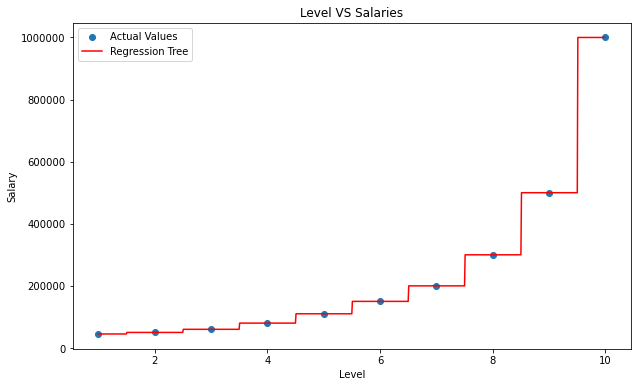

In [245]:
# If we increase the step size we can see this more clearly
new_X = np.arange(X['Level'].min(),X['Level'].max(),0.01)
new_X = np.reshape(new_X,(len(new_X),1))
fig,ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
ax.scatter(X,y,label="Actual Values")
ax.plot(new_X,model.predict(new_X), color='red', label="Regression Tree")
ax.set_title('Level VS Salaries')
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
ax.legend();

In [248]:
# lets see what this model predict for level 6.5
pred = model.predict(np.array([[6.5]]))
pred

D:\Learn And Projects\ML Learn Projects\dummy_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([150000.])

In [249]:
# nice it predicts 150000
# this can be a powerful when there are more dimensions, thats why its perfoming poorly
# we dont have enough data as well as enough dimensions